# Ensamble de los modelos del Proyecto Titanic

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from joblib import load
from scipy.stats import norm
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Carga de los resultados de los modelos

In [2]:
resul_dt = load("f_trainDecisionTree(max_depth = 4, min_samples_split = 3, min_samples_leaf = 15).joblib")
resul_svm = load("f_trainSVM(C = 1, kernel = 'rbf').joblib")
resul_lr = load("f_train_LogRegSigmoid(0.01, 10000, 10000, X_train_reshaped, X_val_reshaped, y_train_reshaped, y_val_reshaped, 32, 0.05, 'lasso').joblib")

## Carga del set deploy

In [3]:
testdp = load("xtestdeploy.joblib")

In [4]:
testdp_y = load("ytestdeploy.joblib")

## Predicciones

In [5]:
def prediccion(i):
    
    x = testdp.iloc[i]
    y = testdp_y.iloc[i]
    
    x = np.array(x).reshape(1,-1)
    # Arbol de decisión
    predict_dt = np.int(resul_dt.predict(x))
    # SVM
    predict_SVM = np.int(resul_svm.predict(x))
    # Regresión logística
    x_lr = np.append(1,x)
    logit = np.dot(x_lr, resul_lr.squeeze())
    lr_probability =  1/(1 + np.exp(-logit))
    predict_lr = np.int(round(lr_probability))
    
    predictions_array = [predict_dt,predict_SVM, predict_lr] #, prediction_nb]
    
    labels_dict = {0:"died", 1:"survived"}
    
    prediction = np.int(mode(predictions_array)[0])
    
    print("Valor de predición:",labels_dict.get(prediction))
    print("Valor Real:", labels_dict.get(y))
    print("Probabilidad LR:", lr_probability)

    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
    
    plot_tree(resul_dt, feature_names = list(testdp.columns), filled = True, proportion = True)
    
    fig.savefig('Titanic_dt.png')
    
    return prediction

prediction: died
actual: survived
logistic regression probability: 0.2789923133318647


0

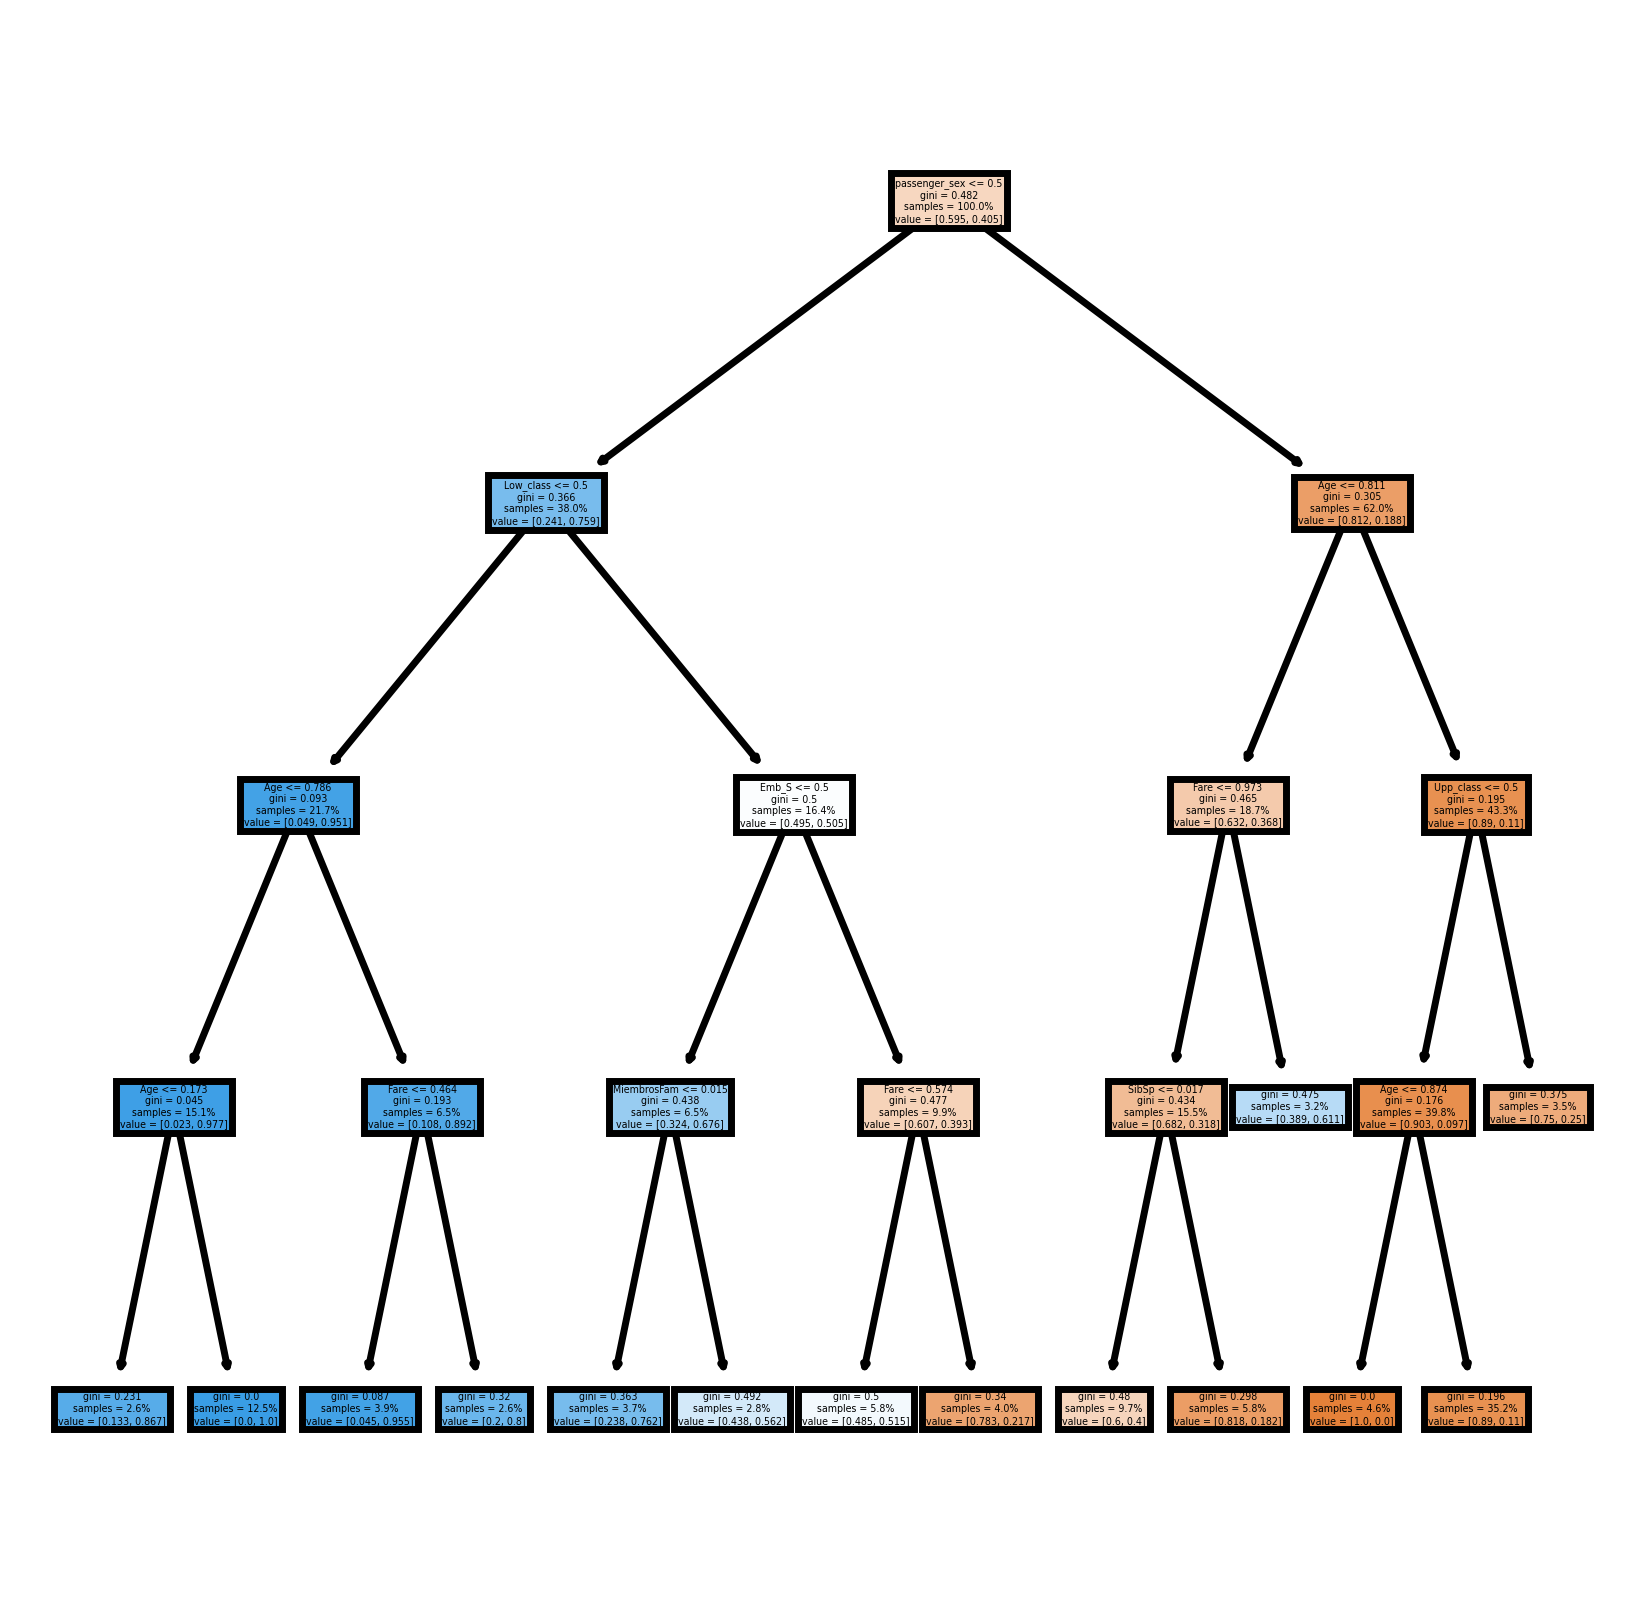

In [14]:
prediccion(0)

Valor de predición: died
Valor Real: survived
Probabilidad LR: 0.30579793869063976


0

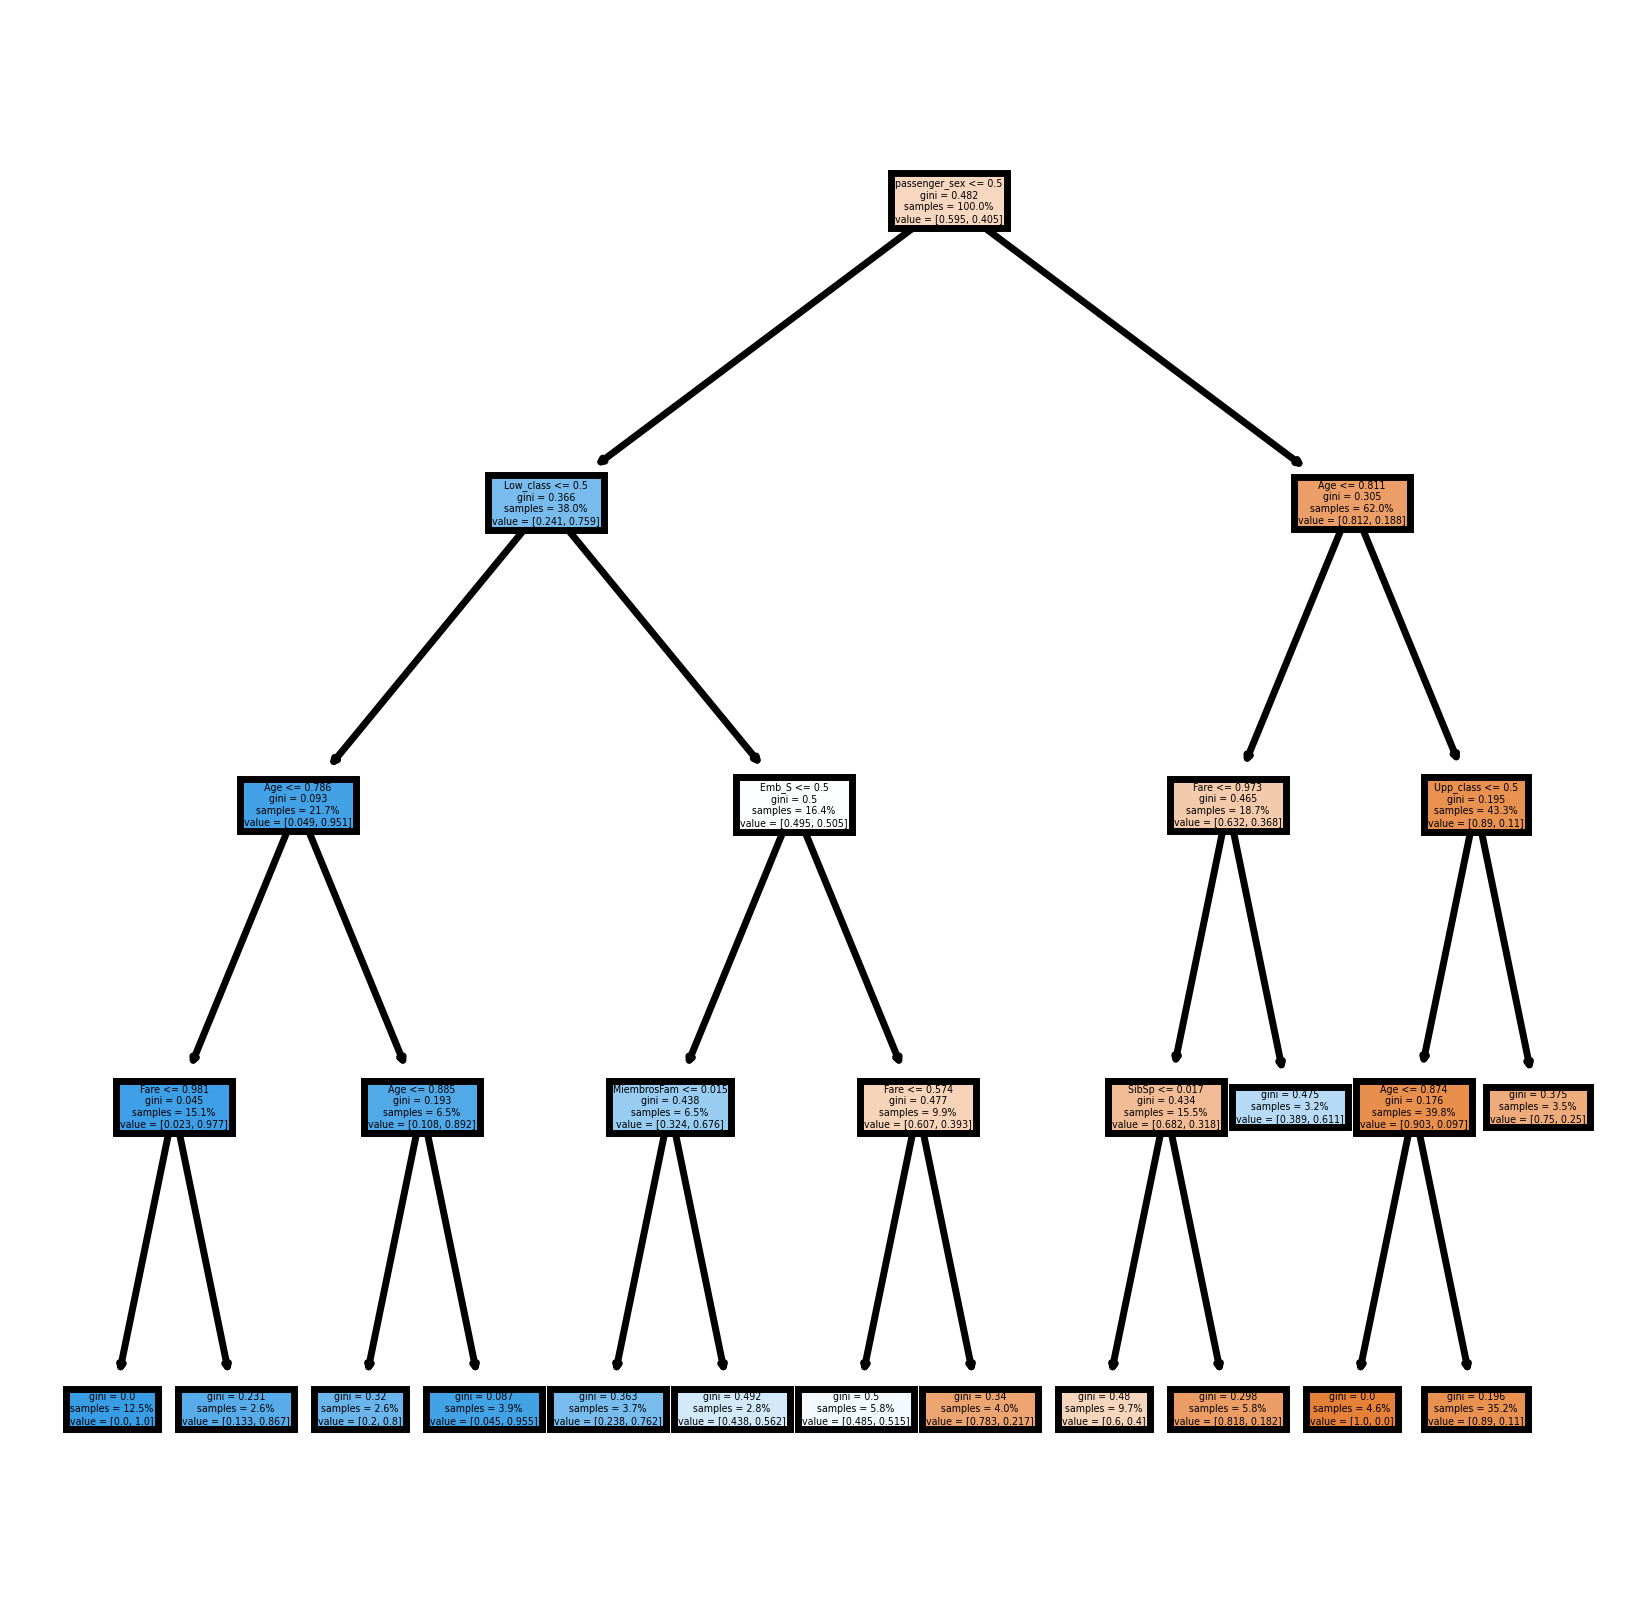

In [6]:
prediccion(5)

Valor de predición: died
Valor Real: died
Probabilidad LR: 0.2500974933454119


0

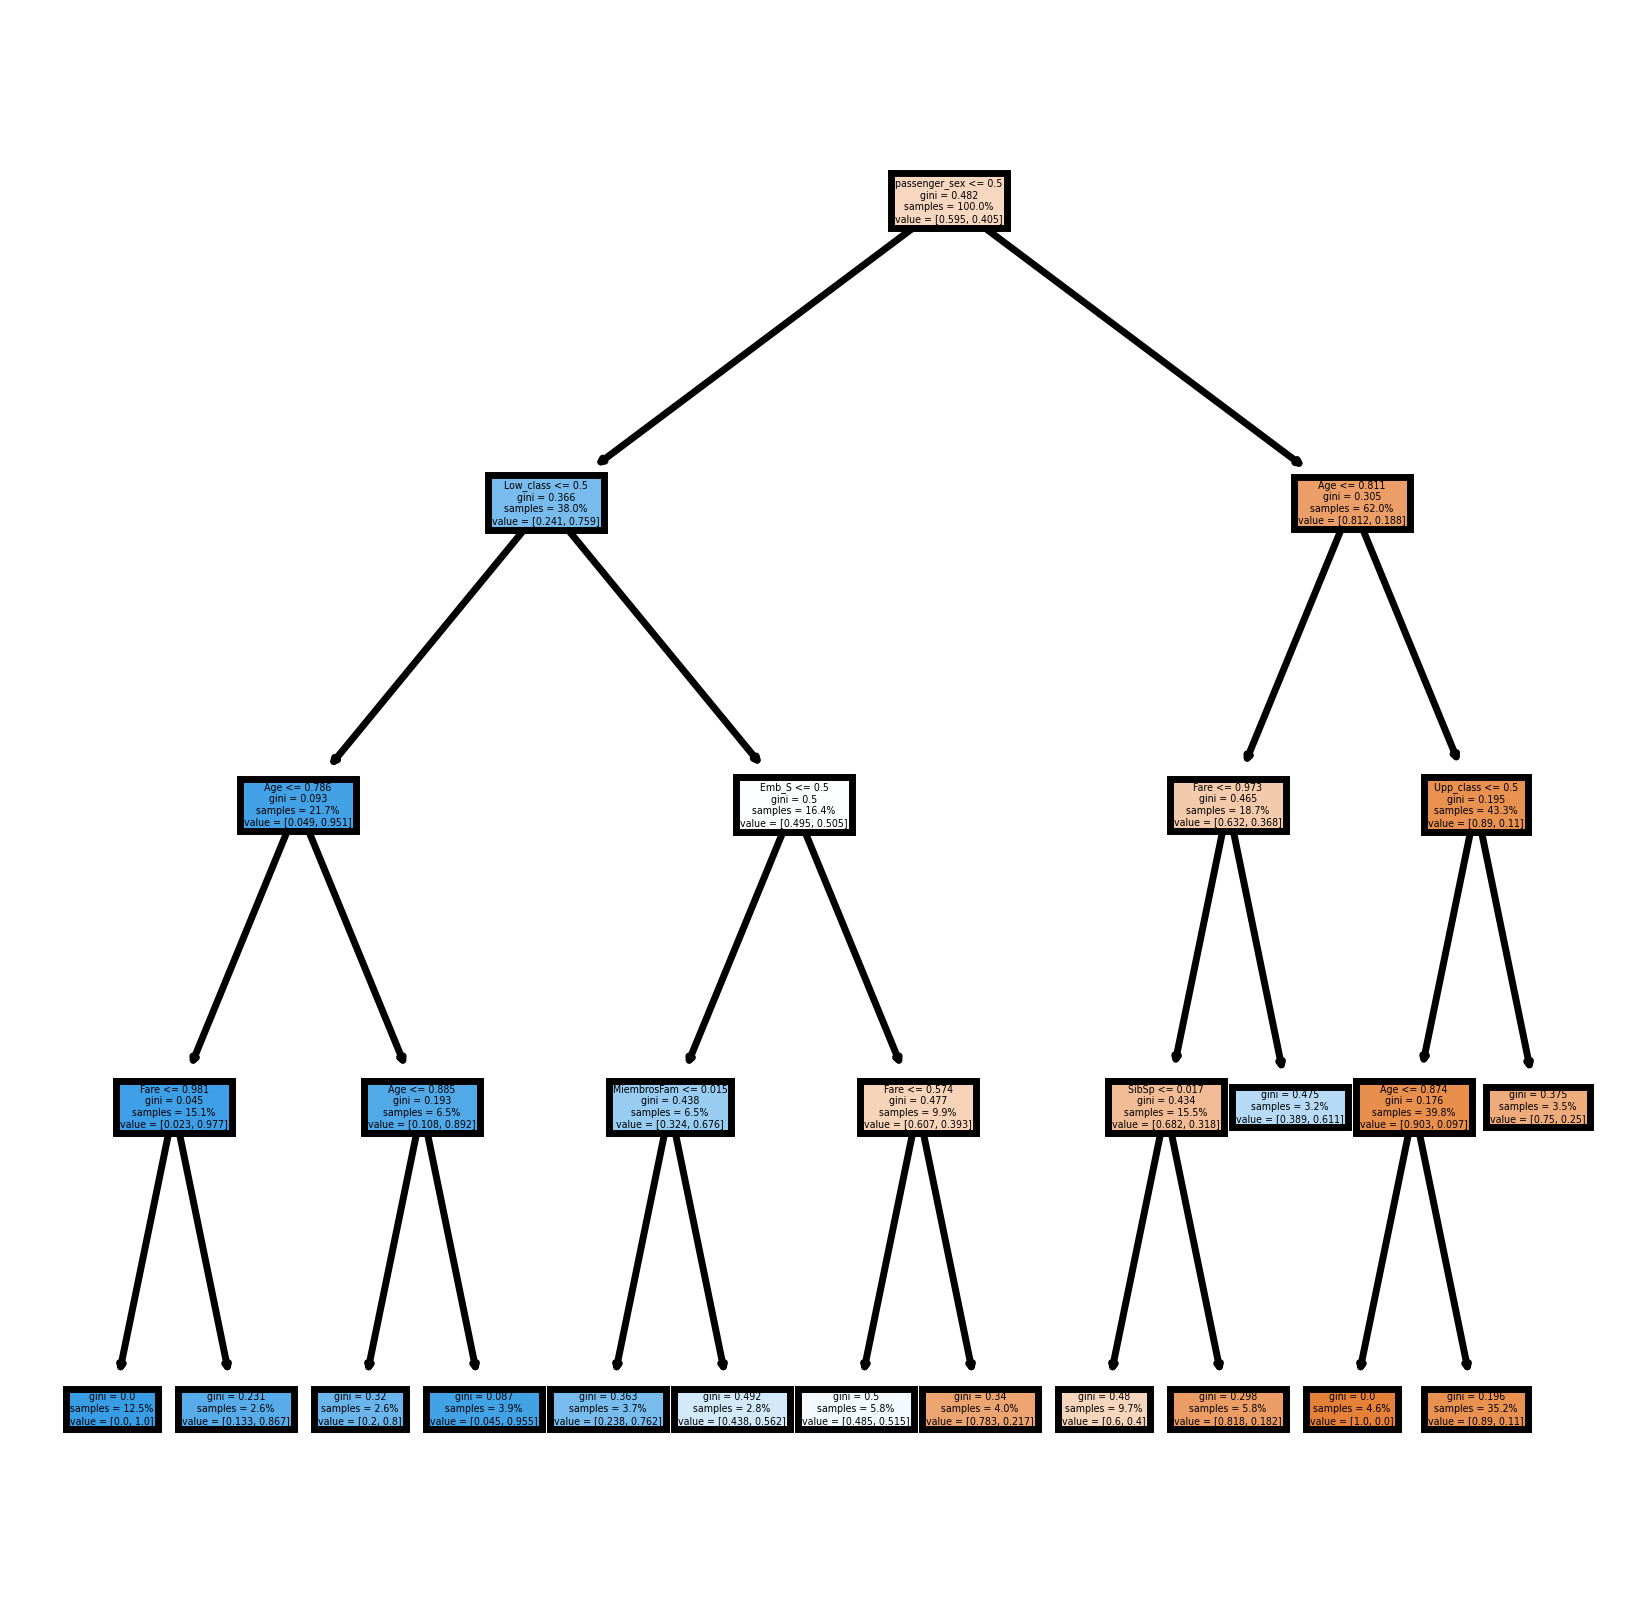

In [7]:
prediccion(10)